In [125]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [126]:
# Esses dados de churn ja oferece dois datasets um de 'treino' e um de 'teste'
# Vamos usar o de treino para adquirir todos os insights e depois usar os dois na parte de ML
# Tem outro dataset, o sampleSubmission, como peguei esses dados de uma competição no Kaggle, o sampleSubmission é como se fosse um 'gabarito
# De forma resumida vamos fazer tudo com o treino, depois vamos usar o test para simular uma nova predição, e depois usar...
# o gabarito para ver o score...podemos fazer tudo com treino e depois so usar o modelo no teste tambem.


In [127]:
train = pd.read_csv('dataset/train.csv')
test = pd.read_csv('dataset/test.csv')

display(train.head(3), train.shape)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no


(4250, 20)

In [128]:
# Eu poderia dar join (merge no pandas) para ficar em so um...mas vou deixar assim

sampleS = pd.read_csv('dataset\sampleSubmission.csv')

display(test.shape, sampleS.shape)

display(test.head(1), sampleS.head(1))

(750, 20)

(750, 2)

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1


,id,churn
0,1,yes


#### 1.1 EDA

In [129]:
train.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [130]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

no     3652
yes     598
Name: churn, dtype: int64

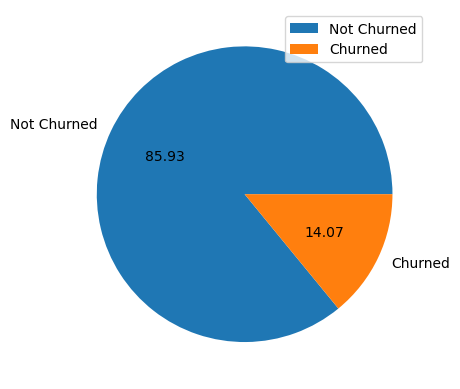

In [131]:
# Temos um dataset meio desbalanceado, tem muito mais 'Não CHURN' do que 'CHURN'.
display(train['churn'].value_counts())

plt.pie(x = train['churn'].value_counts(), labels = ['Not Churned', 'Churned'], autopct='%.2f')
plt.legend()
plt.show()

[Text(0, -15, '3652'), Text(0, -15, '598')]

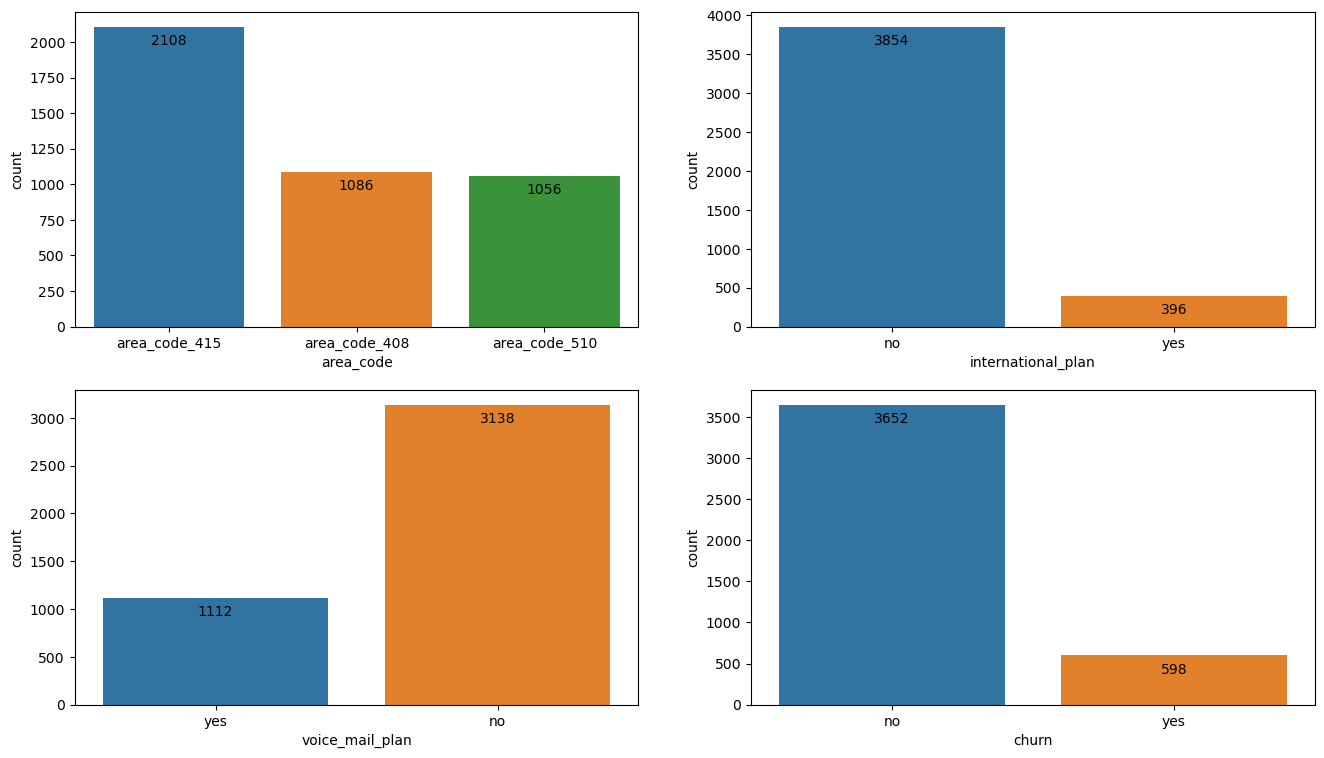

In [132]:
# Na verdade eu vou aproveitar para ver todas as variaveis categoricas, so pra ter um resumo delas e decidir oq fazer
# Menos os estados...não vejo muito sentido em olhar eles
# Acabei colocando o churn novamente, mas é bom que fica bonito o grafico

fig, axs = plt.subplots(2, 2, figsize = (16,9))

sns.countplot(x = train['area_code'], data = train, ax = axs[0,0])
axs[0,0].bar_label(axs[0,0].containers[0], padding = -15)

sns.countplot(x = train['international_plan'], data = train, ax = axs[0,1])
axs[0,1].bar_label(axs[0,1].containers[0], padding = -15)

sns.countplot(x = train['voice_mail_plan'], data = train, ax = axs[1,0])
axs[1,0].bar_label(axs[1,0].containers[0], padding = -15)

sns.countplot(x = train['churn'], data = train, ax = axs[1,1])
axs[1,1].bar_label(axs[1,1].containers[0], padding = -15)

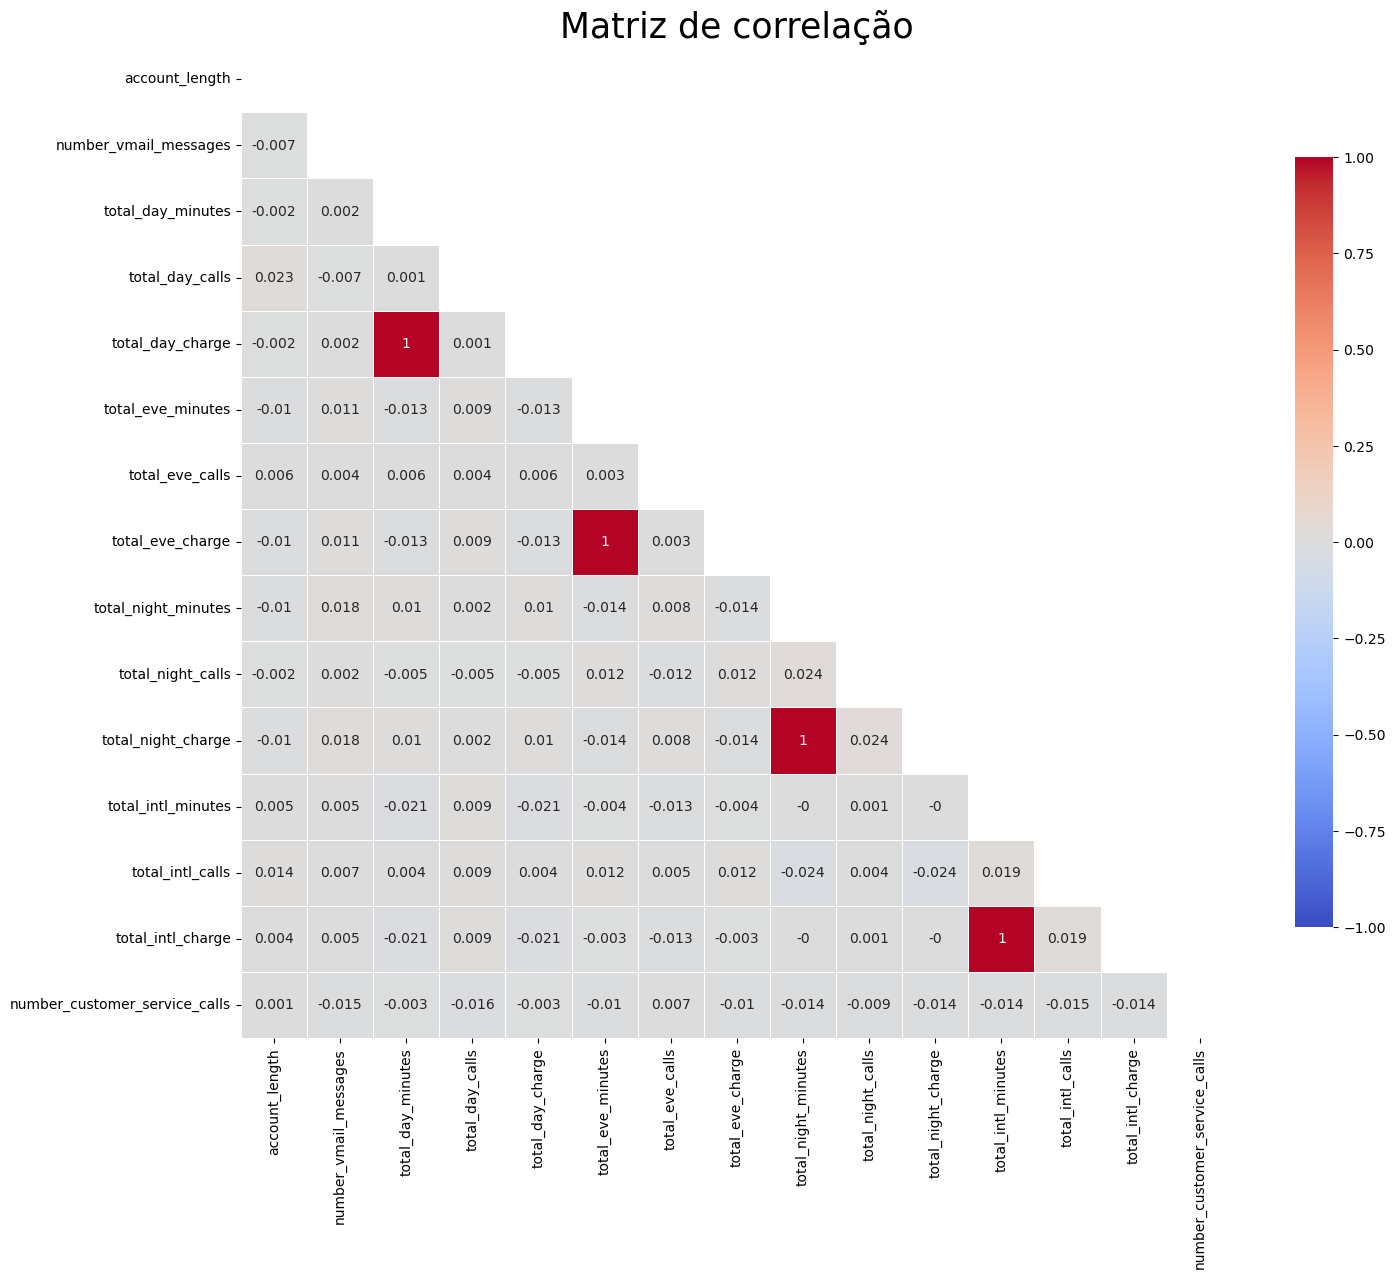

In [133]:
# Dar uma olhada como as variaves se correlacionam
# Tem umas variaveis que sao categoricas

corr =  train.corr().round(3)

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(16, len(train.columns)))
sns.heatmap(data = corr, mask = mask,annot=True,cmap='coolwarm', vmin=-1, vmax=1, center = 0, square = True, linewidths=0.6, cbar_kws={"shrink": .5})
ax.set_title('Matriz de correlação', fontsize = 25)
plt.show()

In [134]:
# Ja vou aproveitar pra tirar os features que tão com corr = 1 !
# Isso acontece provavelmente pois o charge esta diretamente ligado ao numero de minutos que a pessoa passa
# Escolhi deixar o charge, não sei pq vou ser sincero...

train = train.drop(['total_day_minutes','total_eve_minutes','total_night_minutes','total_intl_minutes'], axis=1)
test = test.drop(['total_day_minutes','total_eve_minutes','total_night_minutes','total_intl_minutes'], axis=1)

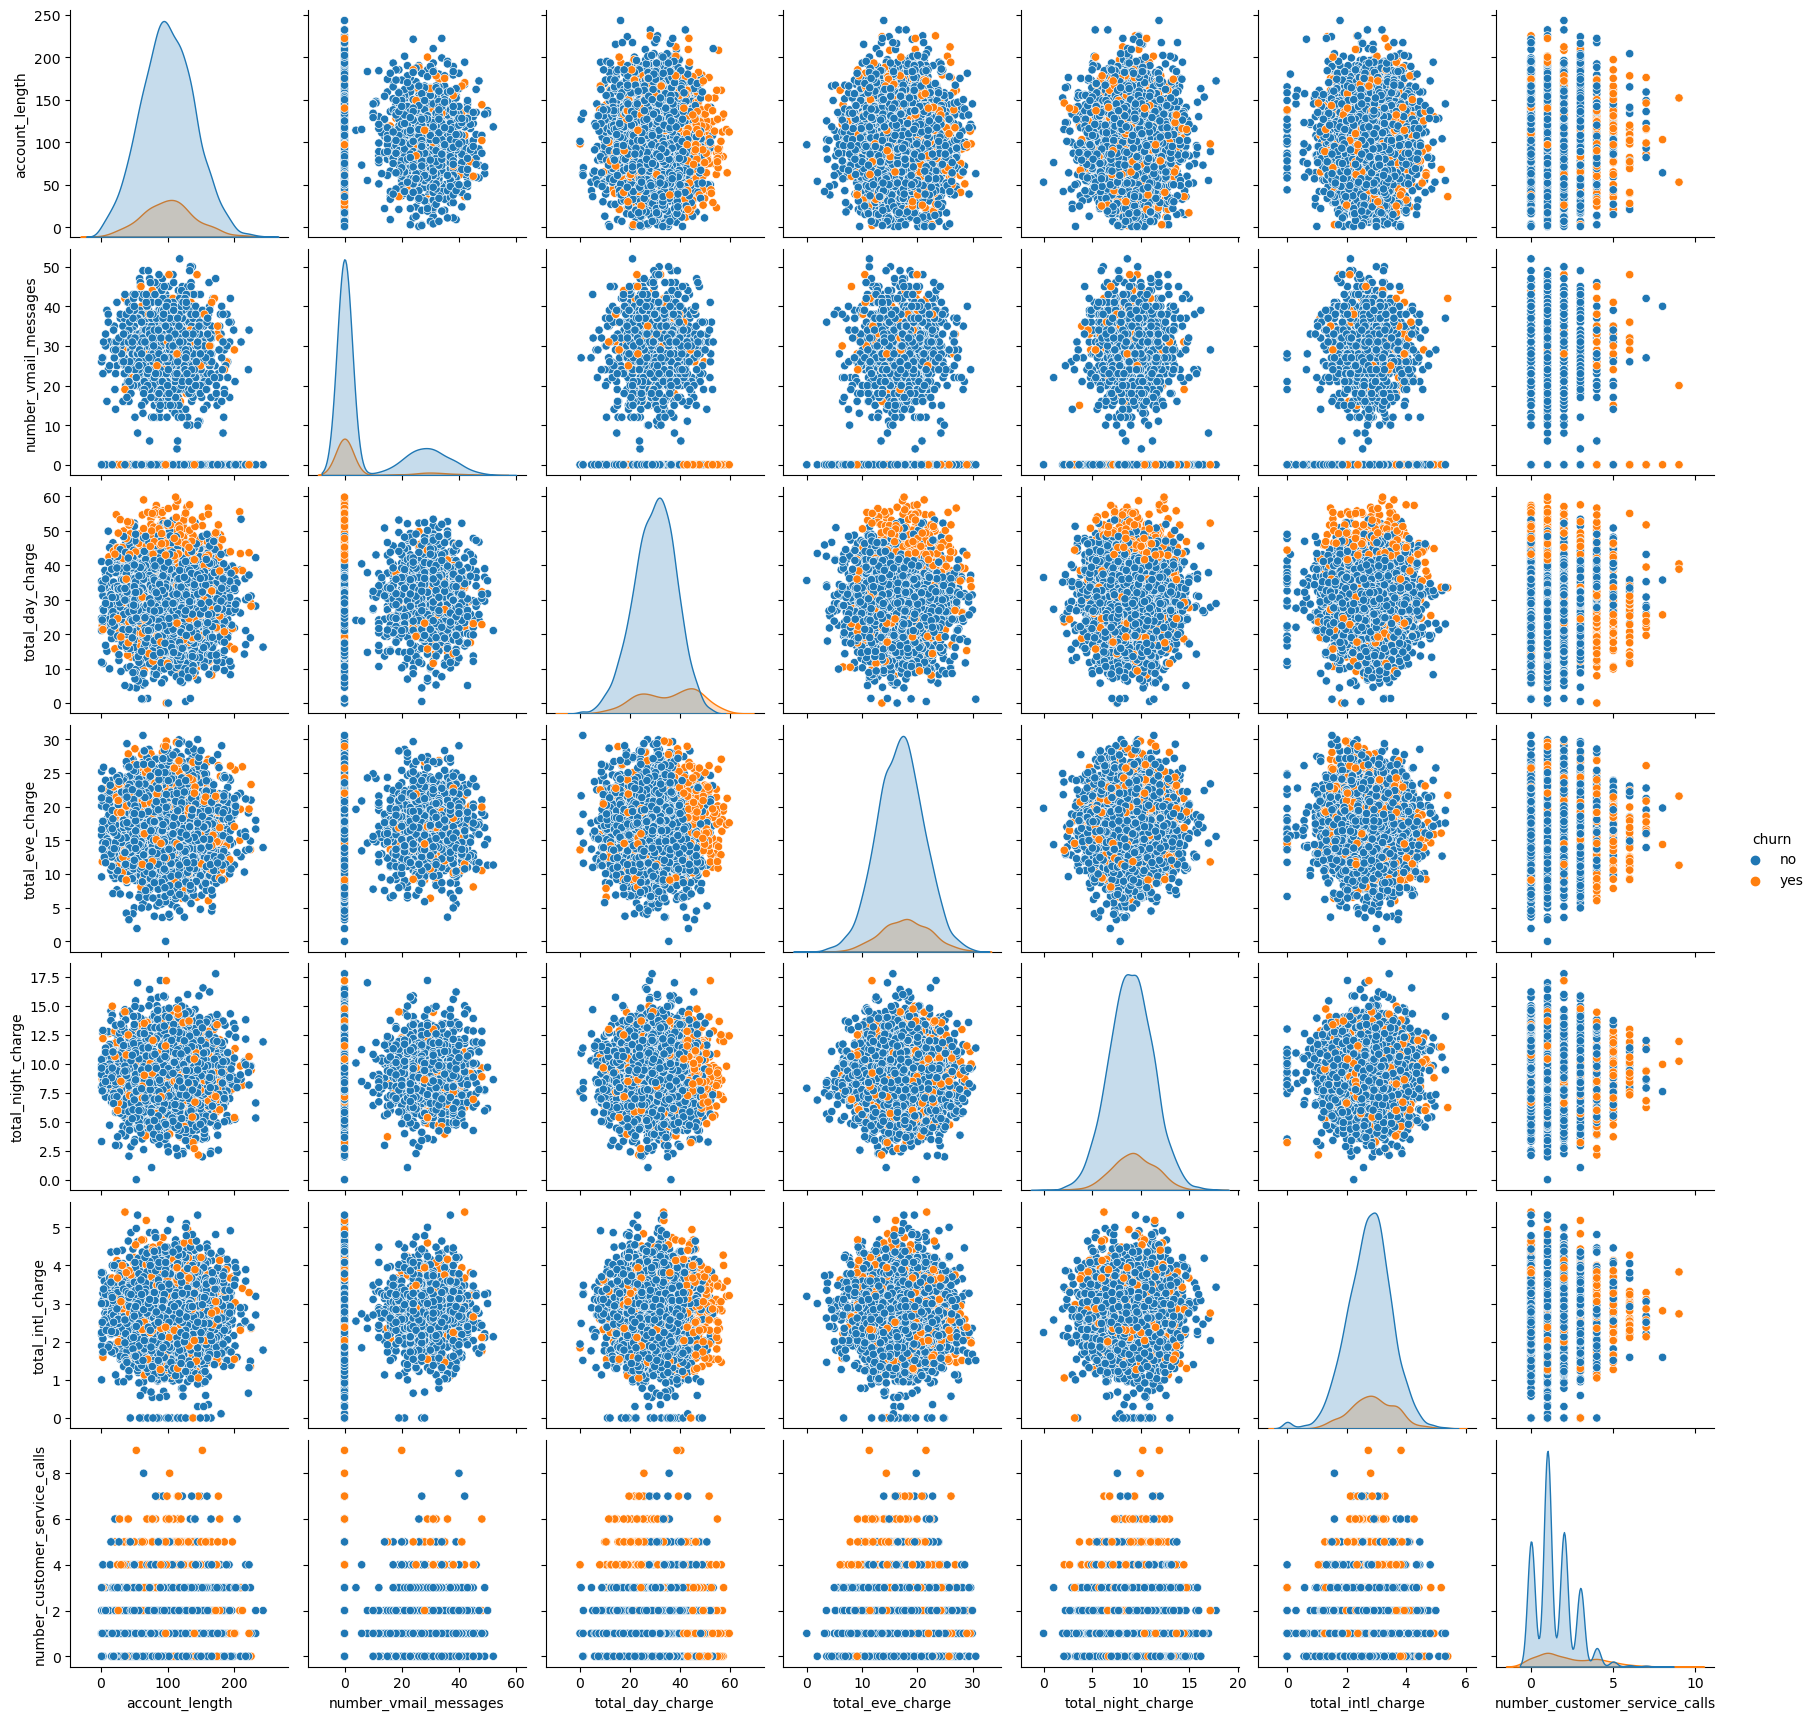

In [135]:
sns.pairplot(train, vars=['account_length','number_vmail_messages', 'total_day_charge',
                          'total_eve_charge','total_night_charge','total_intl_charge','number_customer_service_calls'],hue='churn')

#### 1.2 Normal Distributions

In [136]:
# Eu ia checar um por um pra ver se tem algum feature que precisa tratamento, mas vou plotar mesmo
from scipy.stats import shapiro
shapiro(train['total_intl_charge'])

ShapiroResult(statistic=0.9930943250656128, pvalue=1.831744391583845e-13)

In [137]:
# Por um momento eu pensei em fazer um por um...mas ai a eu pensei melhor e fiz um for mesmo
# sns.displot(train['account_length'], kde = True)
# plt.show()

<Figure size 400x400 with 0 Axes>

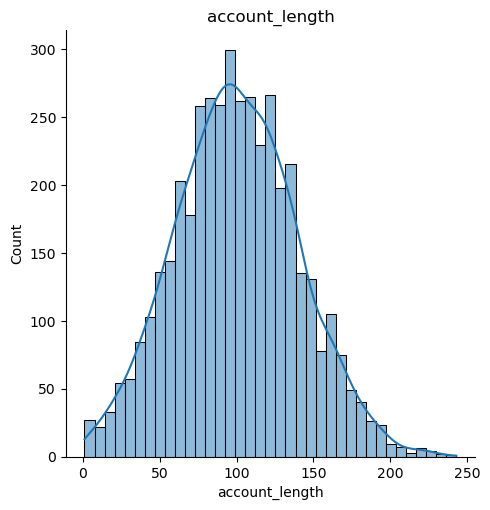

<Figure size 400x400 with 0 Axes>

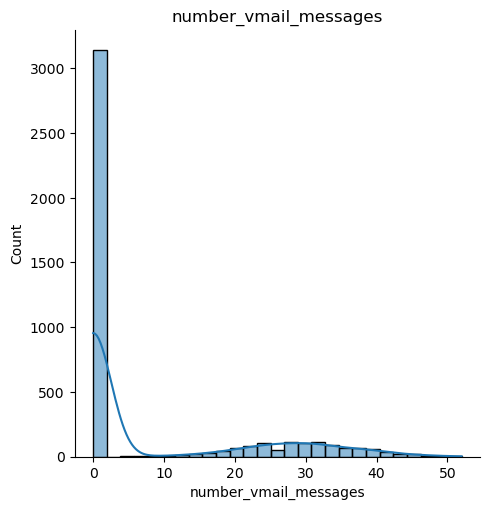

<Figure size 400x400 with 0 Axes>

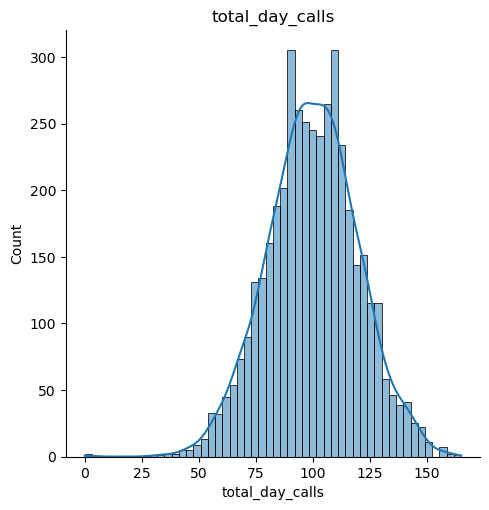

<Figure size 400x400 with 0 Axes>

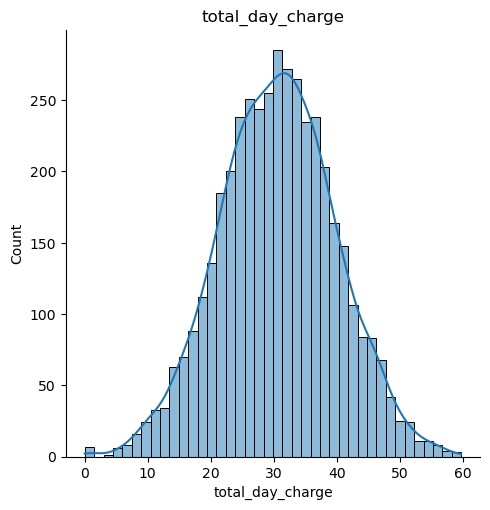

<Figure size 400x400 with 0 Axes>

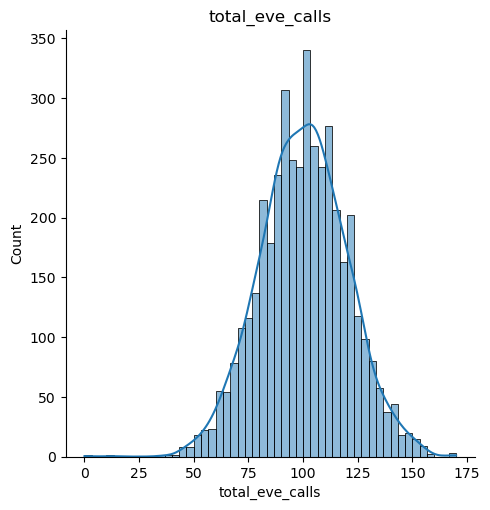

<Figure size 400x400 with 0 Axes>

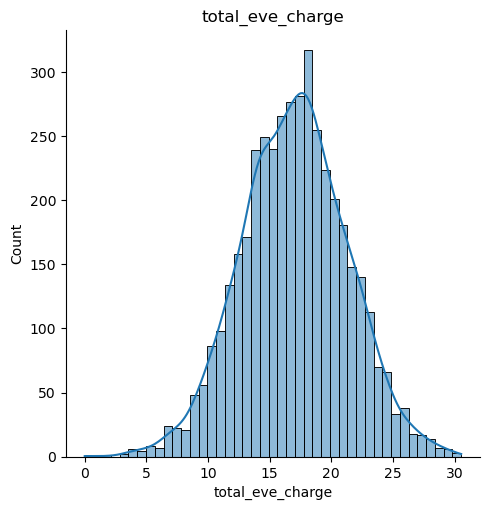

<Figure size 400x400 with 0 Axes>

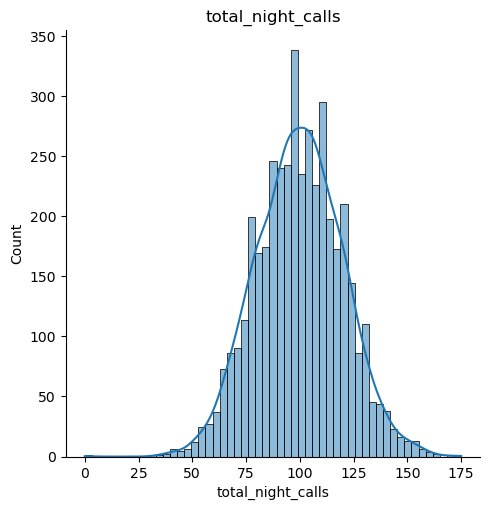

<Figure size 400x400 with 0 Axes>

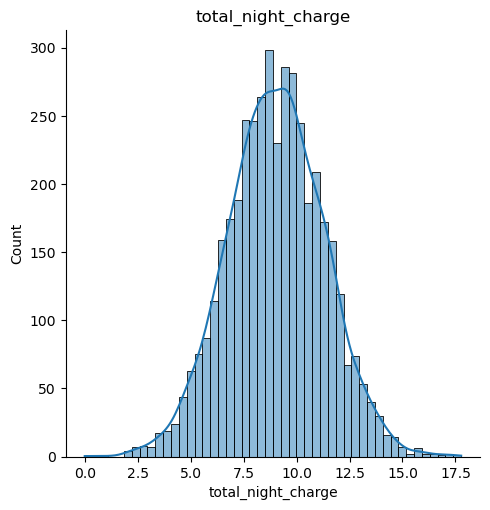

<Figure size 400x400 with 0 Axes>

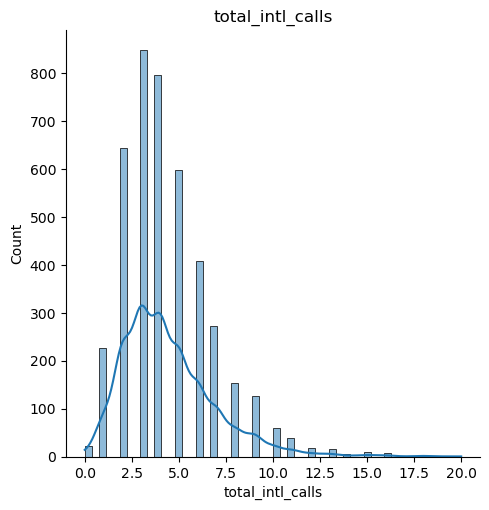

<Figure size 400x400 with 0 Axes>

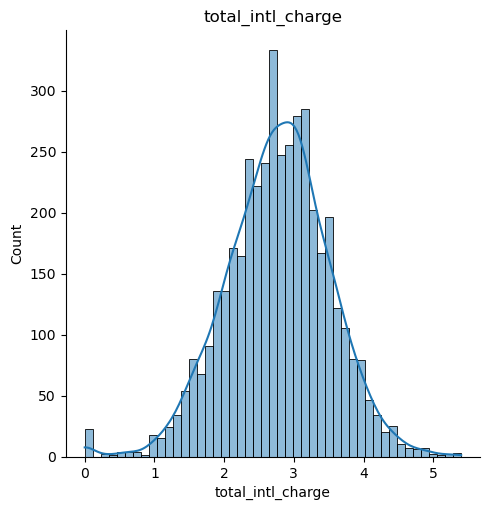

<Figure size 400x400 with 0 Axes>

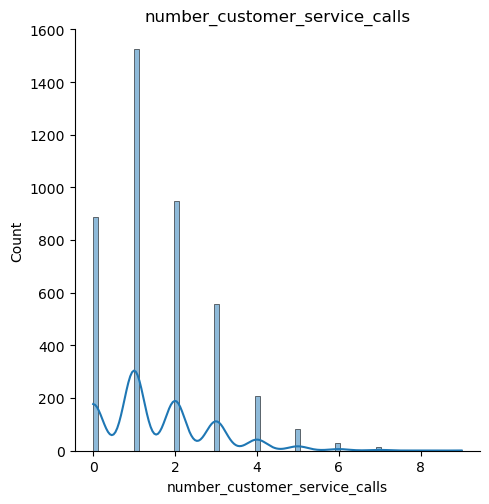

In [138]:
for feature in train:
    if train[feature].dtype != ('O'):
        plt.figure(figsize = (4,4))
        sns.displot(train[feature], kde = True)
        plt.title(feature)
        plt.show()

#### 1.3 Outlier Detection

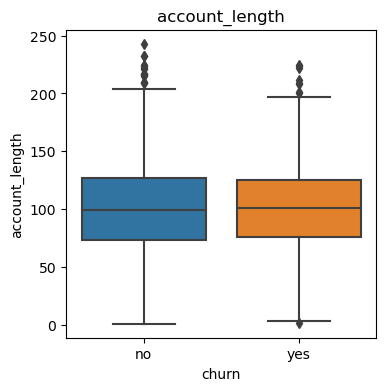

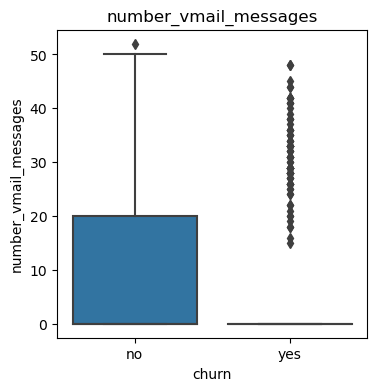

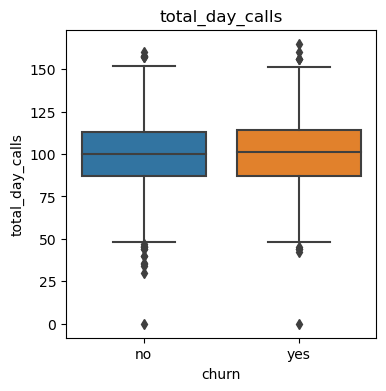

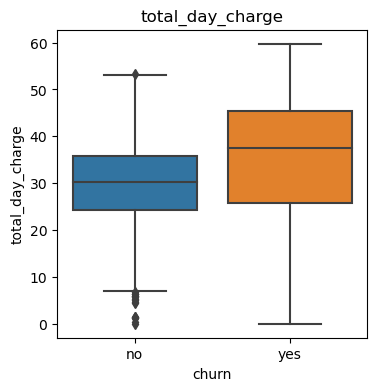

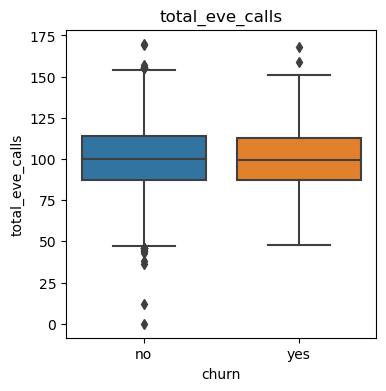

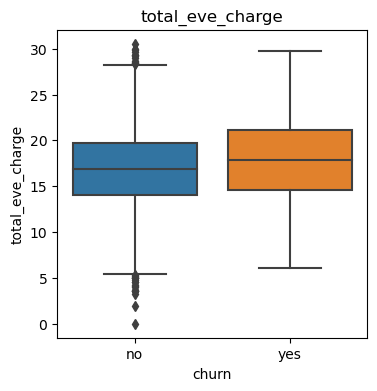

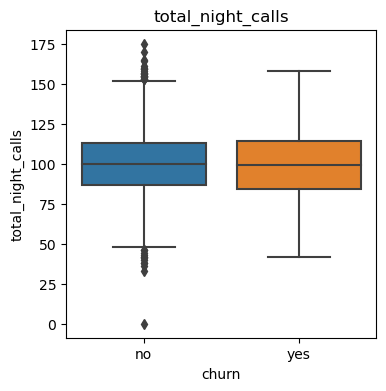

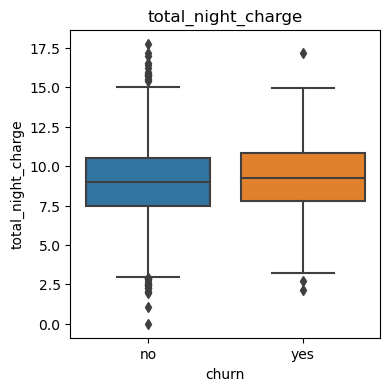

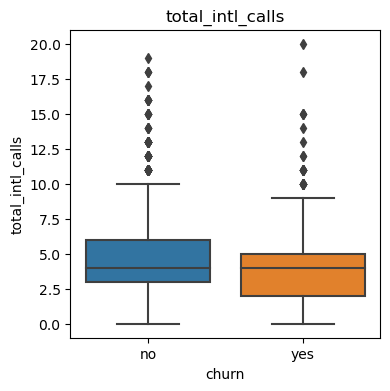

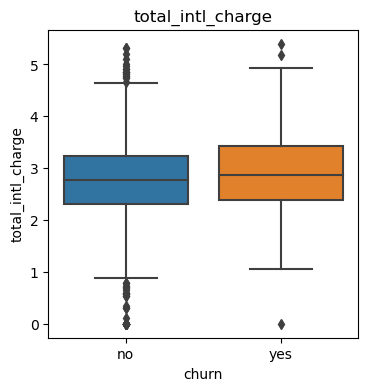

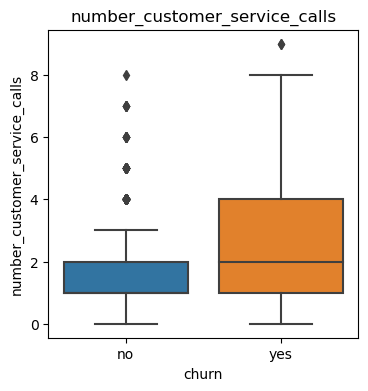

In [139]:
for feature in train:
    if train[feature].dtype != ('O'):
        plt.figure(figsize = (4,4))
        sns.boxplot(x ='churn', y = feature, data = train)
        plt.title(feature)
        plt.show()

In [140]:
# https://careerfoundry.com/en/blog/data-analytics/how-to-find-outliers/
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

def drop_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   not_outliers = df[~((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   outliers_dropped = not_outliers.fillna(not_outliers.mean()).reset_index()
   return outliers_dropped

In [141]:
train = drop_outliers_IQR(train)

C:\Users\Caio1\AppData\Local\Temp\ipykernel_11216\4227797413.py:13: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  not_outliers = df[~((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
C:\Users\Caio1\AppData\Local\Temp\ipykernel_11216\4227797413.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  outliers_dropped = not_outliers.fillna(not_outliers.mean()).reset_index()


In [142]:
find_outliers_IQR(train['account_length'])

162    208.0
Name: account_length, dtype: float64

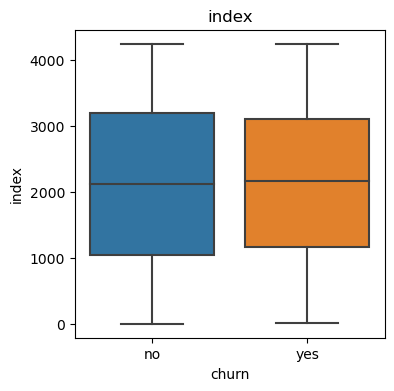

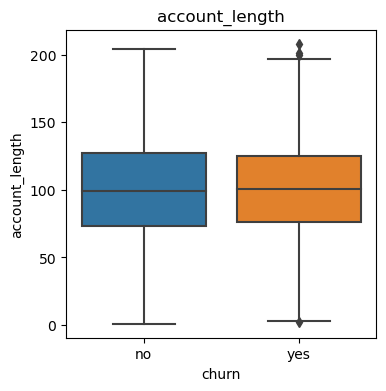

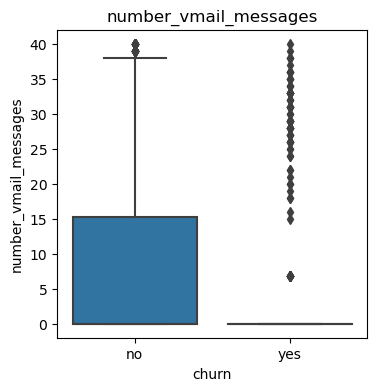

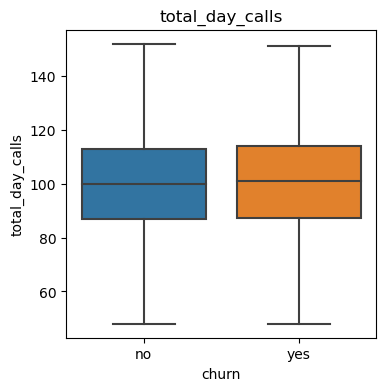

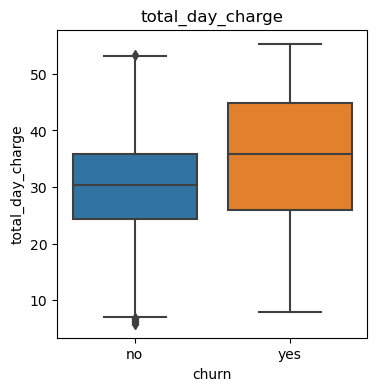

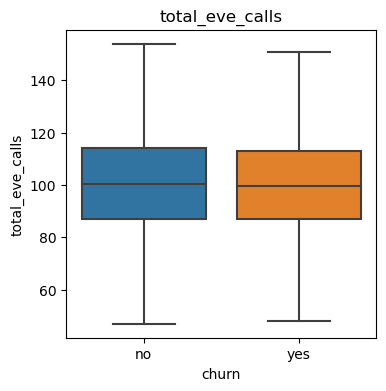

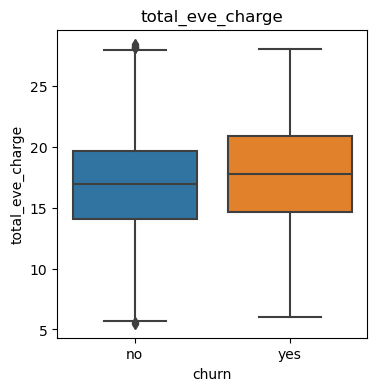

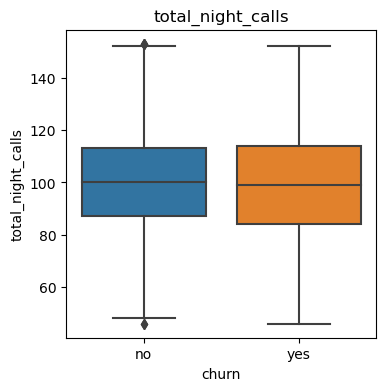

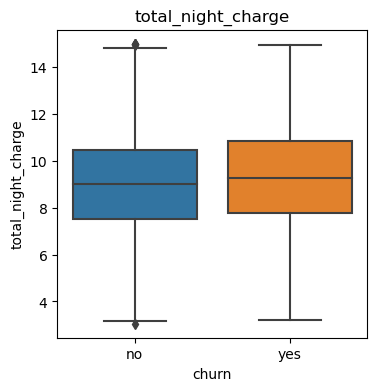

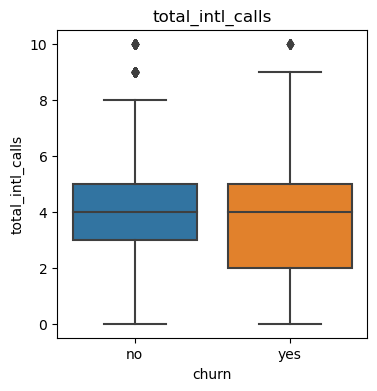

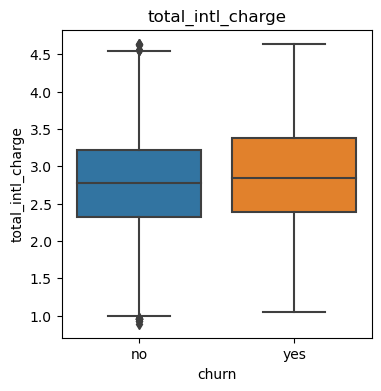

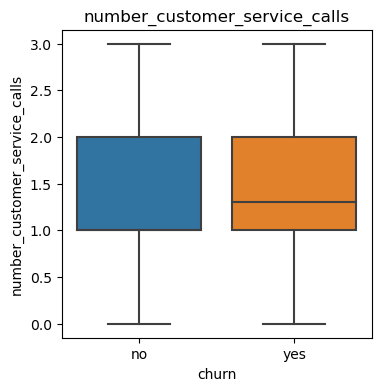

In [143]:
for feature in train:
    if train[feature].dtype != ('O'):
        plt.figure(figsize = (4,4))
        sns.boxplot(x ='churn', y = feature, data = train)
        plt.title(feature)
        plt.show()

#### 1.4 Variaveis categoricas

In [144]:
# State vai ser um pouco mais complicado, pois temos 51 estados e fazer onehot encoding vai gerar muitos features...mas vou mesmo assim
# Vou fazer one-hot para os estados e para area_code
from sklearn.preprocessing import OneHotEncoder


onehot_area = OneHotEncoder()
onehot_area.fit(train[['area_code']])

# Train
encoded_values = onehot_area.transform(train[['area_code']])
train[onehot_area.categories_[0]] = encoded_values.toarray()
train = train.drop('area_code', axis=1)

# Test
encoded_values = onehot_area.transform(test[['area_code']])
test[onehot_area.categories_[0]] = encoded_values.toarray()
test = test.drop('area_code', axis=1)

In [145]:
# Lembrando que aqui TEM churn (Coluna EXTRA)
display(train.shape, train.head(2))

(4250, 19)

,index,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,area_code_408,area_code_415,area_code_510
0,0,OH,107.0,no,yes,26.0,123.0,27.47,103.0,16.62,103.0,11.45,3.0,3.70,1.0,no,0.0,1.0,0.0
1,1,NJ,137.0,no,no,0.0,114.0,41.38,110.0,10.30,104.0,7.32,5.0,3.29,0.0,no,0.0,1.0,0.0


In [146]:
display(test.shape, test.head(2))

(750, 18)

,id,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,area_code_408,area_code_415,area_code_510
0,1,KS,128,no,yes,25,110,45.07,99,16.78,91,11.01,3,2.7,1,0.0,1.0,0.0
1,2,AL,118,yes,no,0,98,37.98,101,18.75,118,9.18,6,1.7,0,0.0,0.0,1.0


In [147]:
onehot_state = OneHotEncoder()
onehot_state.fit(train[['state']])

# Train
encoded_values = onehot_state.transform(train[['state']])
train[onehot_state.categories_[0]] = encoded_values.toarray()
train = train.drop('state', axis=1)

# Test
encoded_values = onehot_state.transform(test[['state']])
test[onehot_state.categories_[0]] = encoded_values.toarray()
test = test.drop('state', axis=1)

In [148]:
# Lembrando que aqui TEM churn (Coluna EXTRA)
display(train.shape, train.head(2))

(4250, 69)

,index,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0,107.0,no,yes,26.0,123.0,27.47,103.0,16.62,103.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,137.0,no,no,0.0,114.0,41.38,110.0,10.30,104.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [149]:
display(test.shape, test.head(2))

(750, 68)

,id,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,1,128,no,yes,25,110,45.07,99,16.78,91,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,118,yes,no,0,98,37.98,101,18.75,118,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [150]:
# Vou trocar os que são apenas sim e não por 0 e 1 (0 = no, 1 = yes)
# Dataset de treino
train['international_plan'].replace(['no','yes'],[0,1],inplace = True)
train['voice_mail_plan'].replace(['no','yes'],[0,1],inplace=True)
train['churn'].replace(['no','yes'],[0,1],inplace = True)


# Dataset de teste
test.international_plan.replace(['no','yes'],[0,1],inplace = True)
test.voice_mail_plan.replace(['no','yes'],[0,1],inplace = True)

train.head()

,index,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0,107.0,0,1,26.0,123.0,27.47,103.0,16.620000,103.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,137.0,0,0,0.0,114.0,41.38,110.0,10.300000,104.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,84.0,1,0,0.0,71.0,50.90,88.0,17.029889,89.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,75.0,1,0,0.0,113.0,28.34,122.0,12.610000,121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,121.0,0,1,24.0,88.0,37.09,108.0,17.029889,118.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 1.5 Variaveis numericas e ML

In [151]:
# Lembrando que CHURN esta bem desbalanceado (Olhar o grafico la em cima)
# Então ja vou resolver ele logo agora, depois dou scale no resto
from sklearn.model_selection import train_test_split


X = train.drop('churn', axis = 1).values
y = train['churn'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

#Resolvendo o churn
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy = 1, random_state=1)   
x_train_s, y_train_s = sm.fit_resample(X_train, y_train.ravel())


In [152]:
# creating the object of minmax scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
test = scaler.transform(test)

c:\Users\Caio1\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


##### Random Forest

In [153]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


# Eu esqueci o parametros do RandomForest, so pra lembra
rf = RandomForestClassifier()
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [154]:
grid = {'n_estimators': [200,300,400,500], 'max_depth': [2,5,10], 'min_samples_leaf': [0.1, 0.2]}
grid_rf = GridSearchCV(estimator = rf, param_grid = grid, cv = 5, n_jobs=-1)

# Fit 'rf' to the training set
grid_rf.fit(X_train, y_train)

# Predict the test set labels 'y_pred'
y_pred = grid_rf.predict(X_test)

In [155]:
display(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
display(confusion_matrix(y_test, y_pred))

0.8470588235294118

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1080
           1       0.00      0.00      0.00       195

    accuracy                           0.85      1275
   macro avg       0.42      0.50      0.46      1275
weighted avg       0.72      0.85      0.78      1275



c:\Users\Caio1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Caio1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Caio1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[1080,    0],
       [ 195,    0]], dtype=int64)

In [156]:
grid_rf.best_estimator_

RandomForestClassifier(max_depth=2, min_samples_leaf=0.1, n_estimators=200)

In [157]:
best_rf = grid_rf.best_estimator_

best_rf.fit(X_train, y_train)
y_pred = best_rf.predict(X_test)

accuracy_score(y_test, y_pred)

0.8470588235294118

##### Decision Tree

In [158]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [159]:
grid = {'max_depth': [3, 4, 5, 6], 'min_samples_leaf': [0.04, 0.06, 0.08], 'max_features': [0.2, 0.4, 0.6, 0.8]}
grid_dt = GridSearchCV(estimator = dt, param_grid = grid,  scoring='accuracy', cv=10, n_jobs=-1)

grid_dt.fit(X_train, y_train)
y_pred = grid_dt.predict(X_test)
accuracy_score(y_test, y_pred)

0.8384313725490196

In [160]:
display(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
display(confusion_matrix(y_test, y_pred))

0.8384313725490196

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1080
           1       0.43      0.16      0.24       195

    accuracy                           0.84      1275
   macro avg       0.65      0.56      0.57      1275
weighted avg       0.80      0.84      0.81      1275



array([[1037,   43],
       [ 163,   32]], dtype=int64)

In [161]:
grid_dt.best_estimator_

DecisionTreeClassifier(max_depth=5, max_features=0.4, min_samples_leaf=0.04)

##### XgBoost

In [162]:
len(y_train)

2975

In [163]:
np.unique(y_train, return_counts=True)[1][1]

403

In [164]:
import math
scale=round(math.sqrt(np.unique(y_train, return_counts=True)[1][0]/np.unique(y_train, return_counts=True)[1][1]),2)
scale

2.53

In [165]:
from xgboost import XGBClassifier

xgb = XGBClassifier(scale_pos_weight=scale, eval_metric ='mlogloss')
xgb.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': 'mlogloss',
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': 2.53,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [166]:
grid = {"learning_rate": [0.10,0.20,0.30 ], "max_depth":[ 3,5,10,20], "n_estimators" :[ 100, 200, 300, 500], 
              "colsample_bytree" :[ 0.3, 0.5, 0.7 ]}
grid_xgb = GridSearchCV(estimator = xgb, param_grid = grid, scoring = 'accuracy', return_train_score = True, verbose=1)

grid_xgb.fit(X_train, y_train)
y_pred = grid_xgb.predict(X_test)
accuracy_score(y_test, y_pred)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


0.9482352941176471

In [167]:
display(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
display(confusion_matrix(y_test, y_pred))

0.9482352941176471

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1080
           1       0.92      0.73      0.81       195

    accuracy                           0.95      1275
   macro avg       0.93      0.86      0.89      1275
weighted avg       0.95      0.95      0.95      1275



array([[1067,   13],
       [  53,  142]], dtype=int64)

In [168]:
grid_xgb.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [169]:
best_xgb = grid_xgb.best_estimator_

best_xgb.fit(X_train, y_train)
y_pred = best_xgb.predict(X_test)

accuracy_score(y_test, y_pred)

0.9482352941176471

#### 1.6 Final

In [176]:
test.shape

(750, 68)

In [171]:
sampleS['churn'].replace(['no','yes'],[0,1],inplace = True)

In [187]:
y_pred2 = grid_xgb.predict(test)

In [188]:
y_pred2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [189]:
sampleS

,id,churn
0,1,1
1,2,0
2,3,0
3,4,1
4,5,1
...,...,...
745,746,1
746,747,1
747,748,0
748,749,1


In [190]:
accuracy_score(y_pred2,sampleS['churn'])

0.6053333333333333